# Библиотеки Python для DS (семинары)

Урок 7. Практическая работа. Сравнение работы алгоритмов деревьев решений. Использование ансамблевых алгоритмов

Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.

1. Загрузка и предварительный анализ данных:
Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

2. Предобработка данных:
Очистите данные от возможных аномалий и пропущенных значений.

3. Построение моделей:
— Разделите данные на обучающую и тестовую выборки.
— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

4. Оценка моделей:
— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
— Сравните результаты моделей, интерпретируйте их.

5. Анализ важности признаков и выводы:
— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

6. Дополнительные задачи (для желающих углубить знания):
— Проведите кросс-валидацию результатов.
— Исследуйте влияние удаления некоторых признаков на производительность моделей.


## Выполнение домашней работы

##### Используем предоставленый к заданию файл fetch_california_housing.xlsx

In [2]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import learning_curve

In [3]:
# Загружаем датасет
df = pd.read_excel('fetch_california_housing.xlsx')

##### 1. Загрузка и предварительный анализ данных:

Загрузите данные из предоставленного файла fetch_california_housing.xlsx.

Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

In [8]:
# Выводим дата фрейм
df.head()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


Этот фрейм данных содержит следующие столбцы:

1. MedInc (Средний доход населения в квартале)
2. HouseAge (Средний возраст дома в квартале)
3. AveRooms (Средние количество команат)
4. AveBedrms (Средние количество спален)
5. Population (Население квартала)
6. AveOccup (Средняя заполняемость дома)
7. Latitude (Широта жилого квартала)
8. Longitude (Долгота жилого квартала)
9. target (Средняя цена дома)

In [9]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


Из общей информации следует:
1. Всего 9 колонок
2. Нулевые значения отсуствуют
3. Нет пропущеных записей в колонках
4. Все колонки находятся в дробных float64 значениях, кроме "HouseAge" и "Population" они в int64

In [13]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. MedInc (Средний доход населения в квартале): 
- Средний доход населения на уровне 3.53
- Миниманая 0.49
- Максимальная 15.00
- Медиана равна 3.87
- Отклонение состовляет 1.89
2. HouseAge (Средний возраст дома в квартале):
- Средние средний возраст дома на уровне 29.00
- Миниманая 1.00
- Максимальная 52.00
- Медиана равна 28.63
- Отклонение состовляет 12.58
3. AveRooms (Средние количество комнат):
- Средние количество комнат на уровне 5.22
- Миниманая 0.84
- Максимальная 141.90
- Медиана равна 5.42
- Отклонение состовляет 2.47
4. AveBedrms (Средние количество спален):
- Средние количество спален на уровне 1.04
- Миниманая 0.33
- Максимальная 34.06
- Медиана равна 1.09
- Отклонение состовляет 0.47
5. Population (Население квартала):
- Средние население квартала на уровне 1166.00
- Миниманая 3.00
- Максимальная 35682.00
- Медиана равна 1425.47
- Отклонение состовляет 1132.46
6. AveOccup (Средняя заполняемость дома):
- Средние средняя заполняемость дома на уровне 2.81
- Миниманая 0.69
- Максимальная 1243.33
- Медиана равна 3.07
- Отклонение состовляет 10.38
7. Latitude (Широта жилого квартала):
- Средняя широта жилого квартала на уровне 34.26
- Миниманая 32.54
- Максимальная 41.95
- Медиана равна 35.63
- Отклонение состовляет 2.13
8. Longitude (Долгота жилого квартала):
- Средняя долгота жилого квартала на уровне -118.49
- Миниманая -124.35
- Максимальная -114.31
- Медиана равна -119.56
- Отклонение состовляет 2.00
9. target (Средняя цена дома)
- Средние цена дома на уровне 1.79
- Миниманая 0.14
- Максимальная 5.00
- Медиана равна 2.06
- Отклонение состовляет 1.15

##### 2. Предобработка данных:
Очистите данные от возможных аномалий и пропущенных значений.

In [10]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


Дубликаты отсутствуют.

In [ ]:
# Смотрим ещё раз тип данных
df.dtypes

MedInc        float64
HouseAge        int64
AveRooms      float64
AveBedrms     float64
Population      int64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [15]:
# Проверка на нулевые значения
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [22]:
# Проверка на NaN значения
df.isnull().any().any()

False

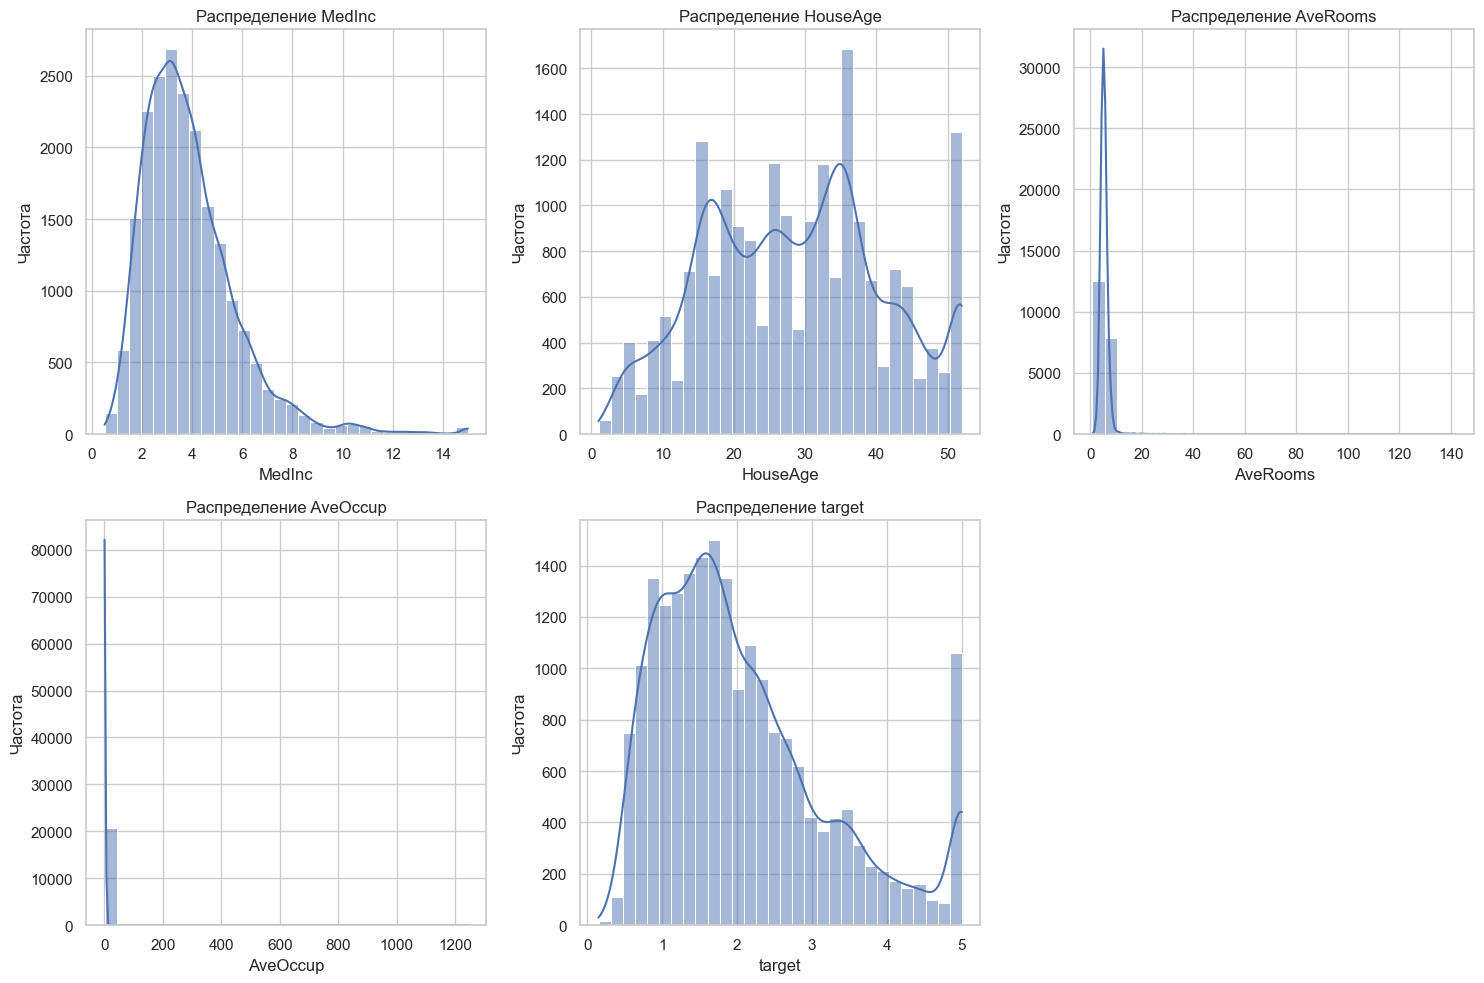

In [25]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'target']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [17]:
# Извлечём diagnosis из признаков
X = df_irus.drop('Species', axis=1)
# Определим целевую переменную
target = df_irus['Species']

In [18]:
# Стандартизация данных
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Создание нового DataFrame со стандартизированными данными
df_scaled = pd.DataFrame(X_scaler, columns=X.columns)

##### 3. Построение моделей:

— Разделите данные на обучающую и тестовую выборки.

— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.

— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

In [19]:
# Определяем переменные для обучения
df_irus_scaled = df_scaled
y = target

# Разделяем данные на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(df_irus_scaled, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (120, 4)
Размер тестового набора: (30, 4)


In [20]:
# Обучение без регуляризации
no_reg = LogisticRegression(penalty=None, random_state=42)
no_reg.fit(X_train, y_train)

# Оценка качества на тренировочных данных
y_train_pred = no_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Оценка качества на тестовых данных
y_test_pred = no_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Получение вероятностей 
y_test_probs_no_reg = no_reg.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_no_reg = r2_score(y_test, y_test_probs_no_reg)

# Вывод результатов
print("Точность на тренировочных данных (без регуляризации):", train_accuracy)
print("Точность на тестовых данных (без регуляризации):", test_accuracy)
print("R2 score (без регуляризации):", r2_score_no_reg)

Точность на тренировочных данных (без регуляризации): 0.9833333333333333
Точность на тестовых данных (без регуляризации): 1.0
R2 score (без регуляризации): -1.049912467165833


Видим что модель явно переобучается, за это может отвечать не только отсуствие регуляризации но и нехватка данных.

In [21]:
# Определение диапазона значений для C (обратный коэффициент регуляризации)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Обучение модели с L1 регуляризацией
# penalty='l1', что означает, что модель будет использовать L1 регуляризацию (также известную как Lasso).
model_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=C_values, cv=5, random_state=42)
model_l1.fit(X_train, y_train)

# Оценка качества
y_train_pred_l1 = model_l1.predict(X_train)
y_test_pred_l1 = model_l1.predict(X_test)

# Получение метрик Accuracy, precision, recall, f1-score, support
train_accuracy_l1 = accuracy_score(y_train, y_train_pred_l1)
test_accuracy_l1 = accuracy_score(y_test, y_test_pred_l1)

# Получение вероятностей 
y_test_probs_l1 = model_l1.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_l1 = r2_score(y_test, y_test_probs_l1)

# Вывод результатов
print("Точность на тренировочных данных (L1 регуляризация):", train_accuracy_l1)
print("Точность на тестовых данных (L1 регуляризация):", test_accuracy_l1)
print("Отчет по классификации (L1 регуляризация):")
print(classification_report(y_test, y_test_pred_l1))
print("R2 score (L1 регуляризация):", r2_score_l1)


Точность на тренировочных данных (L1 регуляризация): 0.9666666666666667
Точность на тестовых данных (L1 регуляризация): 1.0
Отчет по классификации (L1 регуляризация):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

R2 score (L1 регуляризация): -0.606179927588471


In [22]:
# Определение диапазона значений для C (обратный коэффициент регуляризации)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Обучение модели с L2 регуляризацией
# penalty='l2', что означает, что модель будет использовать L2 регуляризацию (также иззвестную как Ridge или Tikhonov regularization).
model_l2 = LogisticRegressionCV(penalty='l2', Cs=C_values, cv=5, random_state=42)
model_l2.fit(X_train, y_train)

# Оценка качества
y_train_pred_l2 = model_l2.predict(X_train)
y_test_pred_l2 = model_l2.predict(X_test)

# Получение метрик Accuracy, precision, recall, f1-score, support
train_accuracy_l2 = accuracy_score(y_train, y_train_pred_l2)
test_accuracy_l2 = accuracy_score(y_test, y_test_pred_l2)

# Получение вероятностей 
y_test_probs_l2 = model_l2.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_l2 = r2_score(y_test, y_test_probs_l2)

# Вывод результатов
print("Точность на тренировочных данных (L2 регуляризация):", train_accuracy_l2)
print("Точность на тестовых данных (L2 регуляризация):", test_accuracy_l2)
print("Отчет по классификации (L2 регуляризация):")
print(classification_report(y_test, y_test_pred_l2))
print("R2 score (L2 регуляризация):", r2_score_l2)

Точность на тренировочных данных (L2 регуляризация): 0.9666666666666667
Точность на тестовых данных (L2 регуляризация): 1.0
Отчет по классификации (L2 регуляризация):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

R2 score (L2 регуляризация): -0.9340525590020823


##### 4. Оценка моделей:

— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).

— Сравните результаты моделей, интерпретируйте их.

##### 5. Анализ важности признаков и выводы:
— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

##### 6. Дополнительные задачи (для желающих углубить знания):
— Проведите кросс-валидацию результатов.
— Исследуйте влияние удаления некоторых признаков на производительность моделей.